<h1 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h1>
<h2 style="text-align:center;">FACULTAD DE INGENIERÍA DE SISTEMAS</h2>
<h3 style="text-align:center;">INGENIERÍA EN COMPUTACIÓN</h3>

**PERÍODO ACADÉMICO:** 2025-A  
**ASIGNATURA:** ICCD412 Métodos Numéricos  
**GRUPO:** GR2  
**TIPO DE INSTRUMENTO:** Notebook<br>
**FECHA DE ENTREGA LÍMITE:** [09/06/2025]  
**ALUMNO:** Alexis Vasco

In [15]:

import math
import matplotlib.pyplot as plt
import numpy as np
import time
import sympy as sp

KeyboardInterrupt: 

 
## Método Analíticos
- Para tomar en cuenta soluciones matemáticas
- Da una solución exacta
- Esta es probable con solución
  

## Método Numéricos
- Soluciones en expresiones matemáticas
- Aproximaciones a los valores
- Problemas complejos o sin soulció exacta


##  Tipos de errores

###  Error de corte o truncamiento

- Se produce cuando **cortamos** un número sin aplicar redondeo, según el número de cifras significativas solicitadas.
- Un algoritmo con **truncamiento fijo** puede ser **exacto** (cumple con su propósito), pero **no necesariamente preciso** (no se acerca al valor real).
- Es común en implementaciones numéricas cuando se busca simplicidad o rapidez.
> 📌 **Nota:** Aunque el truncamiento puede parecer inocente, puede acumular errores en algoritmos iterativos.


In [ ]:

def truncar(numero, decimales):
    """
    Trunca un número decimal a una cantidad específica de decimales sin redondear.

    :param numero: número flotante a truncar.
    :param decimales: número de cifras decimales a mantener.
    :return: número truncado.
    """
    factor = 10.0 ** decimales
    return int(numero * factor) / factor
print("Truncar 2.7182818284 a 4 cifras decimales:", truncar(2.7182818284, 4))

Truncar 2.7182818284 a 4 cifras decimales: 2.7182


### Error de redondeo
- Redondeamos según el número de sifras singificativas, si le numero de a lado de ese número es mayor o igual que 5, se le redondea sumando 1 al número hasta donde llega las sifras sinficativas.
> 📌**Nota:** Un algoritmo con mucho redondeo, puede ser preciso pero no exacto.

In [61]:
def redondear(numero, decimales):
    """
    Redondea un número decimal a una cantidad específica de decimales.

    :param numero: número flotante a redondear.
    :param decimales: número de cifras decimales a mantener.
    :return: número redondeado.
    """
    factor = 10 ** decimales
    return round(numero * factor) / factor
print("Redondear 2.7182818284 a 4 cifras decimales:", redondear(2.7182818284, 4))

Redondear 2.7182818284 a 4 cifras decimales: 2.7183


### Error por desvordamiento
  - Aveces tiene limites finitos de almacenamiento de números
  

In [ ]:
"""
:función: math.exp(1000)
:propósito: Intentar calcular e^1000, lo cual excede el límite numérico de los float en Python
:resultado: Captura un error OverflowError y muestra un mensaje adecuado si ocurre
"""

try:
    resultado = math.exp(1000)  
    print(f"Resultado: {resultado}")
except OverflowError:
    print("Error: Se produjo un desbordamiento al intentar calcular un número demasiado grande.")

Error: Se produjo un desbordamiento al intentar calcular un número demasiado grande.


## Calculo de error
### Error real
$$
E_r = V_{real} - V_{aproximado}
$$

In [ ]:
"""
:numero: Valor aproximado de pi
:param math.pi: Valor real de pi proporcionado por la biblioteca math
:return: error real como la diferencia entre el valor real y el valor aproximado (error = π - aproximación)
"""     
numero = 3.14156
error_real = math.pi - 3.1456
print(error_real)


-0.004007346410206836


### Error absoluto
$$
E_r = |V_{real} - V_{aproximado}|
$$

In [ ]:
"""
:numero: Valor aproximado de pi
:param math.pi: Valor real de pi proporcionado por la biblioteca math
:return: error absoluto como la distancia entre el valor real y el valor aproximado, es decir |π - aproximación|
"""
numero = 3.14156
error_absoluto = abs(math.pi - 3.1456)
print(error_absoluto)

0.004007346410206836


### Error realtivo
$$
E_r = \frac{|V_{real} - V_{aproximado}|}{|V_{real}|}
$$

In [ ]:
"""
:numero: Valor aproximado de pi
:param math.pi: Valor real de pi proporcionado por la biblioteca math
:return: error relativo, calculado como |π - aproximación| / |π|
"""
numero = 3.14156
error_relativo = abs((math.pi - 3.1456) / math.pi)
print(error_relativo)


0.00127557797973196


### Error relativo porcentual
$$
E_r = \frac{|V_{real} - V_{aproximado}|}{|V_{real}|} * 100
$$

In [ ]:
"""
:numero: Valor aproximado de pi
:param math.pi: Valor real de pi proporcionado por la biblioteca math
:return: error porcentual, calculado como (|π - aproximación| / |π|) * 100
"""
numero = 3.14156
error_porcentual = abs((math.pi - 3.1456) / math.pi) * 100
print(error_porcentual)

0.127557797973196


>📌**Nota:** Todos los errores abtes vistos, nos ayuda en esta materia para tener exactitud y presición.

In [42]:

def binario_enteros(numero):
    """
    :numero: número entero a convertir a binario
    :return: cadena que representa la parte entera en binario
    """
    parte_entera = ""
    numero =int(numero)

    if numero == 0:
        return "0"
    
    while numero > 0:
        residuo = numero % 2
        parte_entera = str(residuo) +parte_entera
        numero = numero // 2
    return parte_entera

def binario_decimal(numero):
    """
    :numero: número decimal positivo, solo parte fraccionaria a convertir a binario
    :return: cadena que representa la parte decimal en binario (hasta 60 bits o cuando se aproxima a cero)
    """
    parte_decimal = ""
    numero =numero - int(numero)

    contador = 0

    while numero > 0 and contador < 60:
        numero *=2
        bit = int(numero)
        parte_decimal = parte_decimal + str(bit)
        numero -= bit
        if abs(numero) <1e-10:
            break
        contador += 1
    return parte_decimal

def transformacion_32(numero):
    """
    :numero: número decimal a convertir en formato IEEE 754 de 32 bits (simple precisión)
    :return: string con la representación en binario: signo, exponente de 8 bits y mantisa de 23 bits
    """
    signo = 0 if numero >= 0 else 1
    numero = abs(numero)

    parte_entera_bin = binario_enteros(numero)
    parte_decimal_bin = binario_decimal(numero)

    if parte_entera_bin =="0":

        normalizado =parte_decimal_bin.lstrip("0")
        exponente = -len(parte_decimal_bin) + len(normalizado)
    else:
       
        normalizado = parte_entera_bin + parte_decimal_bin
        exponente = len(parte_entera_bin)- 1

   
    sesgo = 127
    exponente_bin = binario_enteros(exponente + sesgo)

    
    mantisa = normalizado[1:24] if len(normalizado)> 1 else "0" * 23
    mantisa = mantisa.ljust(23, "0")

    return f"{signo} {exponente_bin.zfill(8)} {mantisa}"


def transformacion_64(numero):
    """
    :numero: número decimal a convertir en formato IEEE 754 de 64 bits (doble precisión)
    :return: string con la representación en binario: signo, exponente de 11 bits y mantisa de 52 bits
    """
    signo = 0 if numero >= 0 else 1
    numero = abs(numero)

    parte_entera_bin = binario_enteros(numero)
    parte_decimal_bin = binario_decimal(numero)

    if parte_entera_bin == "0":
    
        normalizado = parte_decimal_bin.lstrip("0")
        exponente = -len(parte_decimal_bin) + len(normalizado)
    else:
       
        normalizado = parte_entera_bin + parte_decimal_bin
        exponente = len(parte_entera_bin)- 1

  
    sesgo = 1023
    exponente_bin = binario_enteros(exponente + sesgo)

    mantisa = normalizado[1:53] if len(normalizado) > 1 else "0" * 52
    mantisa = mantisa.ljust(52, "0")

    return f"{signo} {exponente_bin.zfill(11)} {mantisa}"

print("Transformación IEEE 754")
num_console = float(input("Ingrese un número: "))

        
transformacion_32 = transformacion_32(num_console)
transformacion_64= transformacion_64(num_console)

print(f"Representación IEEE 754 de 32 bits: {transformacion_32}")
print(f"Representación IEEE 754 de 64 bits: {transformacion_64}")





Transformación IEEE 754


Representación IEEE 754 de 32 bits: 0 10000111 00000000001000010100011
Representación IEEE 754 de 64 bits: 0 10000000111 0000000000100001010001111010111000010100011110101110


## Aritmética de dígitos finitos de computador
$$
\pm 0.d_1d_2 \dots d_k \times 10^n
$$


### Operaciones
Abajo de cada operación estará un ejemplo, suponiendo que **X = 5/7** y **Y = 0.714251**, y usamos redondeo a 5 cifras significativas.

**1**. Suma
$$
 x \oplus y = f_l(f_l(x) + f_l(y)) 
$$



In [ ]:

def represenacion_punto_flotante(numero):
    """
    Convierte un número en una representación de punto flotante en base 10,
    con mantisa entre 1 y 10 y un exponente entero.

    :param numero: número flotante a representar
    :return: string con la representación en forma "±mantisa * 10^exponente"
    """
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1

    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

try:
    x= float(input("Ingrese  el primer numero (x):"))
    y= float(input("Ingrese el segundo numero (y):"))
    resultado =x + y

    resultadoflotante= represenacion_punto_flotante(resultado)

    print(f"Suma: {resultado}")
    print(f"Resultado en punto flotante: {resultadoflotante}")
except ValueError:
    print("Ingrese numeros validos")





Suma: 6.0
Resultado en punto flotante: 0.6 * 10^1


**2**. Resta
$$
 x \ominus y = f_l(f_l(x) - f_l(y)) 
$$


In [21]:

def represenacion_punto_flotante(numero):
    """
    :numero: número decimal a representar en notación científica (base 10)
    :return: string con la representación en punto flotante "signo mantisa * 10^exponente"
    """
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"
try:
    x= float(input("Ingrese el primer numero (x):"))
    y= float(input("Ingrese el segundo numero (y):"))
    resultado = x - y
    resultado_punto_flotante = represenacion_punto_flotante(resultado)

    print(f"Resta: {resultado}")
    print(f"Resultado en punto flotante: {resultado_punto_flotante}")
except ValueError:
    print("Ingrese un numoer valido")
    
    



Resta: -5.0
Resultado en punto flotante: -0.5 * 10^1


**3**. Multiplicación
$$
x \otimes y = f_l(f_l(x) * f_l(y)) 
$$



In [22]:

def represenacion_punto_flotante(numero):
    """
    Representa un número en notación científica (punto flotante base 10).
    :param numero: Número decimal a convertir.
    :return: Cadena con la representación en notación científica.
    """
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

try:
    x= float(input("Ingrese el primer numero (x):"))
    y= float(input("Ingrese el segundo numero (y):"))
    resultado = x * y
    resultado_punto_flotante = represenacion_punto_flotante(resultado)

    print(f"Multiplicación: {resultado}")
    print(f"Resultado en punto flotante: {resultado_punto_flotante}")
except ValueError:
    print("Ingrese un número válido")



Multiplicación: 35.0
Resultado en punto flotante: 0.3 * 10^2


**4** División
$$
x \oslash y = f_l\left(\frac{f_l(x)} {f_l(y)}\right)  

In [ ]:

def represenacion_punto_flotante(numero):
    """
    Representa un número en notación científica (punto flotante base 10).
    :param numero: Número decimal a convertir.
    :return: Cadena con la representación en notación científica.
    """
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

try:
    x = float(input("Ingrese el primer numero (x): "))
    y = float(input("Ingrese el sgundo numero (y): "))
    resultado = x * y   
    resultado_punto_flotante = represenacion_punto_flotante(resultado)

    print(f"División: {resultado}")
    print(f"Resultado en punto flotante: {resultado_punto_flotante}")
except ValueError:
    print("Ingrese un número válido")



División: 4.0
Resultado en punto flotante: 0.4 * 10^1


## Convergencia, Divergencia y Tolerancia
### 1. Convergencia
Converge si, al aumentar el número de iteraciones, los resultados se acercan cada vez más a la solución exacta.

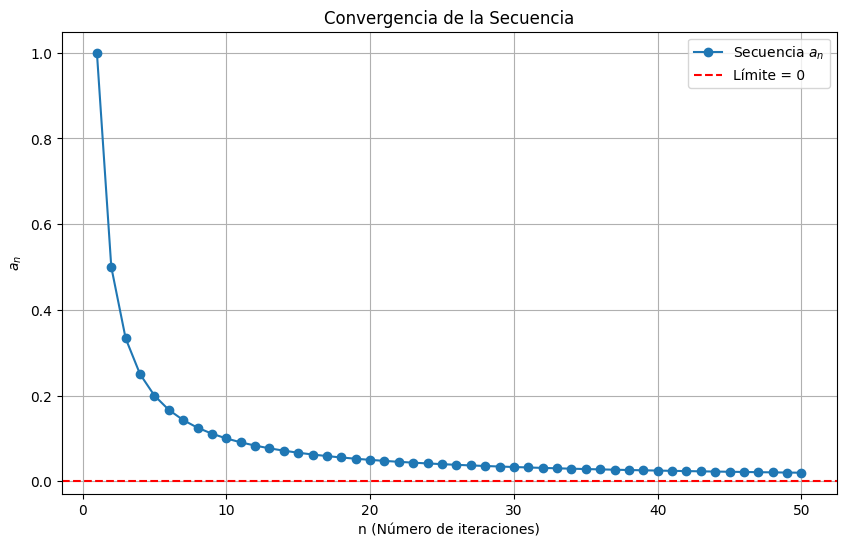

In [ ]:


def generar_secuencia(num_max):
    """
    Genera una secuencia de términos a_n = 1/n para n desde 1 hasta num_max.
    
    :param num_max: Número máximo de términos de la secuencia.
    :return: Lista con los términos de la secuencia.
    """
    secuencia = [1/i for i in range(1, num_max +1)]
    return secuencia

def graficar_secuencia(secuencia, limite):
    """
    Grafica la secuencia junto con una línea horizontal que representa el límite.
    
    :param secuencia: Lista con los términos de la secuencia.
    :param limite: Valor del límite al que converge la secuencia.
    """
    n = np.arange(1, len(secuencia) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(n, secuencia, label="Secuencia $a_n$", marker="o", linestyle="-")
    plt.axhline(y=limite, color="r", linestyle="--", label=f"Límite = {limite}")
    plt.title("Convergencia de la Secuencia")
    plt.xlabel("n (Número de iteraciones)")
    plt.ylabel("$a_n$")
    plt.legend()
    plt.grid()
    plt.show()

num_max = 50
limite = 0
secuencia = generar_secuencia(num_max)
graficar_secuencia(secuencia, limite)




## 2. Divergencia
Si los resultados se alejas indenifidamente o no se estabilizam.

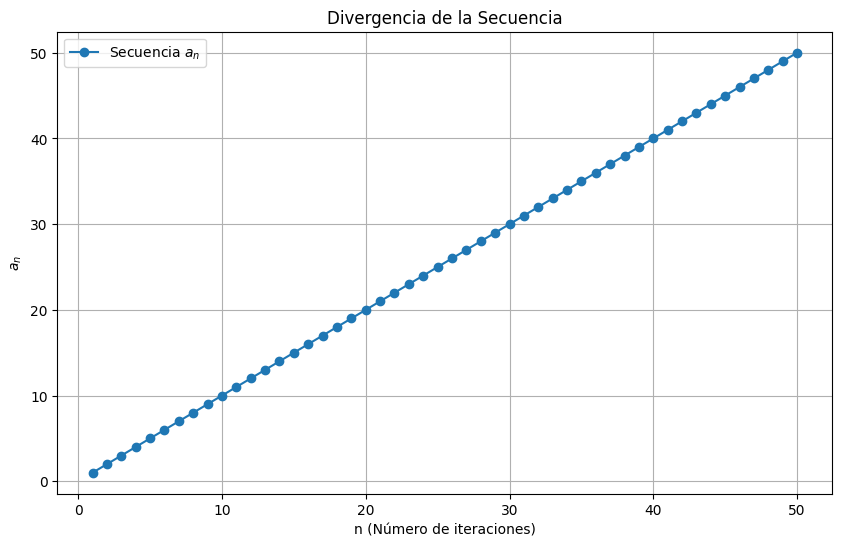

In [ ]:

def generar_secuencia_divergente(num_max):
    """
    Genera una secuencia divergente creciente: a_n = n para n desde 1 hasta num_max.
    
    :param num_max: Número máximo de términos de la secuencia.
    :return: Lista con los términos de la secuencia.
    """
    secuencia = [ n for n in range(1, num_max +1)]
    return secuencia

def graficar_divergencia(secuencia):
    """
    Grafica la secuencia divergente.
    
    :param secuencia: Lista con los términos de la secuencia.
    """
    n = np.arange(1, len(secuencia) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(n, secuencia, label="Secuencia $a_n$", marker="o", linestyle="-")
    plt.title("Divergencia de la Secuencia")
    plt.xlabel("n (Número de iteraciones)")
    plt.ylabel("$a_n$")
    plt.legend()
    plt.grid()
    plt.show()

num_max = 50
secuencia = generar_secuencia_divergente(num_max)
graficar_divergencia(secuencia)

## 3. Tolerancia
Es el limite aceptable de error.

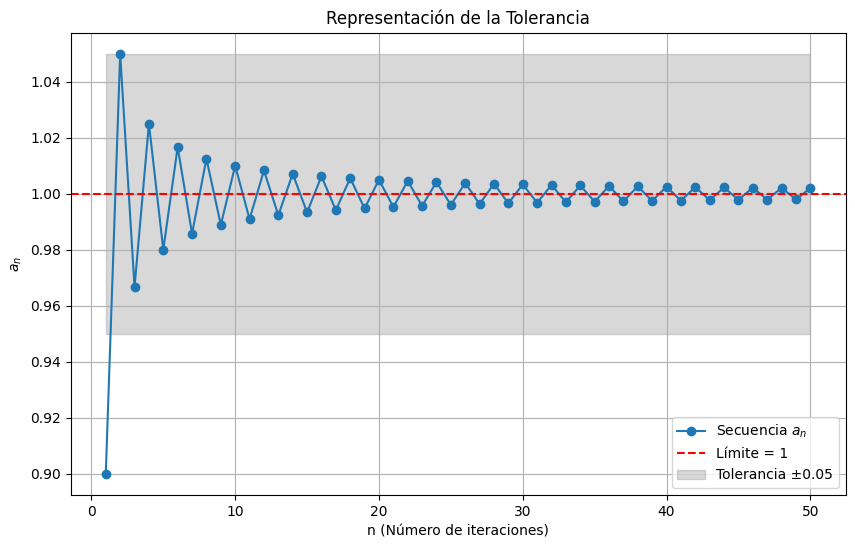

In [ ]:

def generar_secuencia_tolerancia(num_max):
    """
    Genera una secuencia que oscila alrededor de un límite con una amplitud decreciente.
    
    :param num_max: Número máximo de términos.
    :return: La secuencia generada y el límite al que se aproxima.
    """
    limite = 1
    secuencia = [limite + (-1)**n *0.1/ n for n in range(1, num_max +1)]
    return secuencia, limite

def graficar_tolerancia(secuancia, limite,tolerancia):
    """
    Grafica la secuencia junto con el límite y la banda de tolerancia.
    
    :param secuencia: Lista con los términos de la secuencia.
    :param limite: Valor límite de la secuencia.
    :param tolerancia: Tolerancia aceptable alrededor del límite.
    """
    n = np.arange(1, len(secuencia) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(n, secuencia, label="Secuencia $a_n$", marker="o", linestyle="-")
    plt.axhline(y=limite, color="r", linestyle="--", label=f"Límite = {limite}")
    plt.fill_between(n, limite - tolerancia, limite + tolerancia, color="gray", alpha=0.3, label=f"Tolerancia ±{tolerancia}")
    plt.title("Representación de la Tolerancia")
    plt.xlabel("n (Número de iteraciones)")
    plt.ylabel("$a_n$")
    plt.legend()
    plt.grid()
    plt.show()

num_max = 50    
tolerancia = 0.05

secuencia, limite = generar_secuencia_tolerancia(num_max)
graficar_tolerancia(secuencia, limite, tolerancia)

## Criterios de parada
Se usa dentro de los algoritmos para evitar lazos infinitos

### Criterio de parada: Error absoluto

El criterio de parada basado en el error absoluto se define como:

$$
|P_n - P_{n-1}| < \varepsilon
$$

Donde:

- $P_n$: Es la aproximación actual.
- $P_{n-1}$: Es la aproximación anterior.
- $\varepsilon$: Es la tolerancia o el error absoluto aceptable.

El algoritmo se detendrá cuando la diferencia absoluta entre dos iteraciones consecutivas sea menor que $\varepsilon$.

In [27]:
def parada_absoluto(tolerancia):
    """
    Ejecuta un proceso iterativo que divide el valor inicial por 2 en cada iteración,
    calculando el error absoluto entre la iteración actual y la anterior.
    Se detiene cuando el error absoluto es menor que la tolerancia dada.

    :param tolerancia: El valor mínimo de error absoluto para detener la iteración.
    """
    valor_inicial = float(input("Ingrese el valor inicial: "))
    iteracion = 0

    while True:
        valor_actual = valor_inicial /2
        error_absoluto = abs(valor_actual - valor_inicial)

        print(f"Iteracion {iteracion}: P_n = {valor_actual:.8f}, Error Absoluto = {error_absoluto:.8f}")

        if error_absoluto < tolerancia:
            print(f"Criterio de parada alcanzado en la iteracipn {iteracion}.")
            break
        valor_inicial = valor_actual
        iteracion += 1

tolerancia = 0.001

parada_absoluto(tolerancia)

Iteracion 0: P_n = 2.50000000, Error Absoluto = 2.50000000
Iteracion 1: P_n = 1.25000000, Error Absoluto = 1.25000000
Iteracion 2: P_n = 0.62500000, Error Absoluto = 0.62500000
Iteracion 3: P_n = 0.31250000, Error Absoluto = 0.31250000
Iteracion 4: P_n = 0.15625000, Error Absoluto = 0.15625000
Iteracion 5: P_n = 0.07812500, Error Absoluto = 0.07812500
Iteracion 6: P_n = 0.03906250, Error Absoluto = 0.03906250
Iteracion 7: P_n = 0.01953125, Error Absoluto = 0.01953125
Iteracion 8: P_n = 0.00976562, Error Absoluto = 0.00976562
Iteracion 9: P_n = 0.00488281, Error Absoluto = 0.00488281
Iteracion 10: P_n = 0.00244141, Error Absoluto = 0.00244141
Iteracion 11: P_n = 0.00122070, Error Absoluto = 0.00122070
Iteracion 12: P_n = 0.00061035, Error Absoluto = 0.00061035
Criterio de parada alcanzado en la iteracipn 12.


### Criterio de parada: Error relativo

El criterio de parada basado en el error relativo se define como:

$$
 \frac{|P_n - P_{n-1}|}{|P_n|} < \varepsilon  \quad P_n \neq 0
$$



In [ ]:
def parada_relativo():
    """
    Demuestra un ejemplo simple de criterio de parada basado en error absoluto.
    Simula un proceso iterativo que va mejorando una aproximación P_n,
    y se detiene cuando el error absoluto entre iteraciones es menor
    que una tolerancia dada.

    : La función imprime en cada iteración el valor actual P_n y el error absoluto,
      mostrando cómo se evalúa el criterio de parada en la práctica.
    """
    tolerancia = 0.001
    max_iter = 20
    P_n = 1.0  # Valor inicial arbitrario
    error_abs = float('inf')
    iteracion = 0

    while iteracion < max_iter and error_abs > tolerancia:
        P_n_anterior = P_n
        # Simula una mejora (por ejemplo, reduce P_n a la mitad cada iteración)
        P_n = P_n / 2  
        error_abs = abs(P_n - P_n_anterior)

        print(f"Iteracion {iteracion}: P_n = {P_n}, Error Absoluto = {error_abs}")

        iteracion += 1

parada_relativo()

Iteracion 0: P_n = 0.5, Error Absoluto = 0.5
Iteracion 1: P_n = 0.25, Error Absoluto = 0.25
Iteracion 2: P_n = 0.125, Error Absoluto = 0.125
Iteracion 3: P_n = 0.0625, Error Absoluto = 0.0625
Iteracion 4: P_n = 0.03125, Error Absoluto = 0.03125
Iteracion 5: P_n = 0.015625, Error Absoluto = 0.015625
Iteracion 6: P_n = 0.0078125, Error Absoluto = 0.0078125
Iteracion 7: P_n = 0.00390625, Error Absoluto = 0.00390625
Iteracion 8: P_n = 0.001953125, Error Absoluto = 0.001953125
Iteracion 9: P_n = 0.0009765625, Error Absoluto = 0.0009765625


### Criterio de parada: Valor de la función

El criterio de parada basado en el valor de la función se define como:

$$
|f(P_{n-1}) | < \varepsilon
$$



In [ ]:
def criterio_valor_funcion(tolerancia):
    """
    Aplica el método de Newton para encontrar la raíz de f(x) = x^2 - 2,
    utilizando como criterio de parada que el valor absoluto de f(x) sea menor
    que la tolerancia especificada.

    :param tolerancia: Valor mínimo absoluto de f(x) para detener el proceso.
    """
    
    def funcion(x):
        return x**2 - 2  

    def derivada_funcion(x):
        return 2 * x  

    valor_actual =1.00
    iteracion = 1

    while True:
        valor_funcion = abs(funcion(valor_actual))  

        print(f"Iteración {iteracion}: P_n = {valor_actual:.8f}, |f(P_n)| = {valor_funcion:.8f}")

        if valor_funcion < tolerancia:  
            print(f"Criterio de parada alcanzado en la iteración {iteracion}")
            break

        valor_actual = valor_actual - funcion(valor_actual) / derivada_funcion(valor_actual)
        iteracion += 1


tolerancia = 0.001  
criterio_valor_funcion(tolerancia)

Iteración 1: P_n = 1.00000000, |f(P_n)| = 1.00000000
Iteración 2: P_n = 1.50000000, |f(P_n)| = 0.25000000
Iteración 3: P_n = 1.41666667, |f(P_n)| = 0.00694444
Iteración 4: P_n = 1.41421569, |f(P_n)| = 0.00000601
Criterio de parada alcanzado en la iteración 4


### Criterio de parada: Número de iteraciones
$$
i < K

In [ ]:
def parada_numero_iteraciones(max_iteraciones):
    """
    Realiza una iteración dividiendo el valor actual entre 2, hasta alcanzar
    un número máximo de iteraciones especificado.

    :param max_iteraciones: Número máximo de iteraciones para realizar.
    """
    valor_actual = float(input("Ingrese el valor inicial: "))
    iteracion= 0

    while iteracion <= max_iteraciones:
        print(f"itercion {iteracion}: P_n = {valor_actual:.8f}")
        valor_actual /=2
        iteracion +=1
    print(f"Criterio de parada alcanzado despies de {max_iteraciones} iteraciones.")

max_iteraciones = 5
parada_numero_iteraciones(max_iteraciones)


   

itercion 0: P_n = 5.00000000
itercion 1: P_n = 2.50000000
itercion 2: P_n = 1.25000000
itercion 3: P_n = 0.62500000
itercion 4: P_n = 0.31250000
itercion 5: P_n = 0.15625000
Criterio de parada alcanzado despies de 5 iteraciones.


### Criterio de parada: Tiempo
$$ t <T_{ms}

In [ ]:

def parada_tiempo(tiempo_maximo):
    """
    :param tiempo_max: Tiempo máximo en segundos para que la función siga ejecutándose
    :return: None, imprime el valor actual y el tiempo transcurrido en cada iteración hasta alcanzar el tiempo máximo
    """
    valor_actual = float(input("Ingrese el valor inicial: "))
    iteracion =1
    tiempo_inicio = time.time()

    while True:
        tiempo_actual = time.time() - tiempo_inicio

        if tiempo_actual >= tiempo_maximo:
            print(f"Criterio de parada alcanzado: Tiempo maximo de {tiempo_maximo} segundos.")
            break
        print(f"iteracion {iteracion}: P_n = {valor_actual:.8f}, Tiempo transcurrido: {tiempo_actual:.2f} segundos")
        valor_actual = valor_actual /2
        iteracion+=1
        time.sleep(0.01)

tiempo_maximo=0.1

parada_tiempo(tiempo_maximo)

iteracion 1: P_n = 4.00000000, Tiempo transcurrido: 0.00 segundos
iteracion 2: P_n = 2.00000000, Tiempo transcurrido: 0.01 segundos
iteracion 3: P_n = 1.00000000, Tiempo transcurrido: 0.02 segundos
iteracion 4: P_n = 0.50000000, Tiempo transcurrido: 0.03 segundos
iteracion 5: P_n = 0.25000000, Tiempo transcurrido: 0.04 segundos
iteracion 6: P_n = 0.12500000, Tiempo transcurrido: 0.05 segundos
iteracion 7: P_n = 0.06250000, Tiempo transcurrido: 0.06 segundos
iteracion 8: P_n = 0.03125000, Tiempo transcurrido: 0.07 segundos
iteracion 9: P_n = 0.01562500, Tiempo transcurrido: 0.09 segundos
iteracion 10: P_n = 0.00781250, Tiempo transcurrido: 0.10 segundos
Criterio de parada alcanzado: Tiempo maximo de 0.1 segundos.


### Método de la bisección 
Es una de las formas más simples que se usa para encontrar la raíz
 de una ecuación polinómica, este método se basa en el teorema del valor intermedio. 
 Lo trabaja mediante intervalos y realiza divisiones sucesivas hasta approximarse a un valor real, seleccionando el sub-intervalo donde se mantenga el signo de la función.


In [ ]:

def biseccion_con_tabla(funcion, a, b, tolerancia, max_iteraciones=50):
    """
    Método de bisección con tabla detallada de iteraciones.
    
    :param funcion: función para la cual se busca la raíz
    :param a: límite inferior del intervalo
    :param b: límite superior del intervalo
    :param tolerancia: precisión deseada para la raíz aproximada
    :param max_iteraciones: número máximo de iteraciones
    :return: raíz aproximada de la función en el intervalo [a, b] si existe, None si no es posible aplicar el método
    """
    
    if funcion(a) * funcion(b) >= 0:
        print(" El método de la bisección no se puede realizar en este intervalo")
        print(f"f({a}) = {funcion(a):.6f}")
        print(f"f({b}) = {funcion(b):.6f}")
        print("La función debe cambiar de signo en el intervalo [a,b]")
        return None
    
    print(" MÉTODO DE LA BISECCIÓN")
    print("=" * 80)
    print(f"Intervalo inicial: [{a}, {b}]")
    print(f"Tolerancia: {tolerancia}")
    print(f"f({a}) = {funcion(a):.6f}")
    print(f"f({b}) = {funcion(b):.6f}")
    print()
    
    # Encabezados de la tabla
    print(f"{'i':<3} {'a':<10} {'b':<10} {'c':<10} {'f(a)':<12} {'f(b)':<12} {'f(c)':<12} {'Error':<12} {'Error %':<10}")
    print("-" * 95)
    
    iteracion = 0
    c_anterior = None
    
    while iteracion < max_iteraciones:
       
        c = (a + b) / 2
        
        fa = funcion(a)
        fb = funcion(b)
        fc = funcion(c)
        
     
        if c_anterior is not None:
            error_absoluto = abs(c - c_anterior)
            error_porcentual = (error_absoluto / abs(c)) * 100 if c != 0 else 0
        else:
            error_absoluto = abs(b - a) / 2  # Error inicial
            error_porcentual = (error_absoluto / abs(c)) * 100 if c != 0 else 0
      
        print(f"{iteracion:<3} {a:<10.6f} {b:<10.6f} {c:<10.6f} {fa:<12.6f} {fb:<12.6f} {fc:<12.6f} {error_absoluto:<12.6f} {error_porcentual:<10.2f}")
        
       
        if abs(fc) < 1e-15:
            print(f"\nRaíz exacta encontrada en la iteración {iteracion}")
            return c
        
      
        if iteracion > 0 and error_absoluto < tolerancia:
            print(f"\nConvergencia alcanzada en la iteración {iteracion}")
            print(f"La raíz aproximada es: {c:.8f}")
            print(f"Error absoluto final: {error_absoluto:.8f}")
            print(f"Error porcentual final: {error_porcentual:.4f}%")
            return c
        
        
        if fa * fc < 0:
            b = c  
        else:
            a = c  
        
        c_anterior = c
        iteracion += 1
    
    print(f"\n Número máximo de iteraciones ({max_iteraciones}) alcanzado")
    return c

# Aqui vamos a poner la funcoin que querenos
def funcion_ejemplo(x):
    return x**2 - x - math.e

a = 1
b = 3
tolerancia = 1e-6

raiz = biseccion_con_tabla(funcion_ejemplo, a, b, tolerancia)




 MÉTODO DE LA BISECCIÓN
Intervalo inicial: [1, 3]
Tolerancia: 1e-06
f(1) = -2.718282
f(3) = 3.281718

i   a          b          c          f(a)         f(b)         f(c)         Error        Error %   
-----------------------------------------------------------------------------------------------
0   1.000000   3.000000   2.000000   -2.718282    3.281718     -0.718282    1.000000     50.00     
1   2.000000   3.000000   2.500000   -0.718282    3.281718     1.031718     0.500000     20.00     
2   2.000000   2.500000   2.250000   -0.718282    1.031718     0.094218     0.250000     11.11     
3   2.000000   2.250000   2.125000   -0.718282    0.094218     -0.327657    0.125000     5.88      
4   2.125000   2.250000   2.187500   -0.327657    0.094218     -0.120626    0.062500     2.86      
5   2.187500   2.250000   2.218750   -0.120626    0.094218     -0.014180    0.031250     1.41      
6   2.218750   2.250000   2.234375   -0.014180    0.094218     0.039775     0.015625     0.70      
7 

### Funciones validas para la funcion de bisección
| Función válidas    | Observaciones                                         |
|--------------------|------------------------------------------------------|
| - Polinomios<br>- Trigonométricas<br>- Exponenciales<br>- Logarítmicas | La función debe de cambiar de signo en el intervalo a,b |

## Método de Newont-Raphson
Esta técnica se basa en las derivadas para encontrar las raíces de funciones a través de un proceso iterativo. A partir de un valor inicial se aplica una fórmula que usa la derivada de la función para generar mejores aproximaciones en cada paso.

In [ ]:

def newton_raphson_tabla(funcion, derivada, x0, tolerancia, max_iteraciones):
    """
    Calcula una raíz aproximada de una función usando el método de Newton-Raphson con tabla detallada.

    :param funcion: función para la cual se busca la raíz
    :param derivada: derivada de la función
    :param x0: valor inicial para la iteración
    :param tolerancia: criterio de parada basado en la diferencia entre iteraciones
    :param max_iteraciones: máximo número de iteraciones permitidas
    :return: raíz aproximada si converge, None si falla o si la derivada es cero en alguna iteración
    """
    
    print("=== MÉTODO DE NEWTON-RAPHSON ===")
    
    print(f"{'i':<3} {'P_n':<12} {'f(x)':<12} {'f\'(x)':<12} {'Error':<12}")
    print("-" * 60)
    
    iteracion = 0
    x_actual = x0
    x_anterior = None
    
    while iteracion < max_iteraciones:
        fx = funcion(x_actual)
        dfx = derivada(x_actual)

        if abs(dfx) < 1e-15:
            print("\nEl método no puede funcionar si la derivada es 0.")
            return None

       
        if x_anterior is not None:
            error =abs(x_actual - x_anterior)
        else:
            error = 0 
        print(f"{iteracion:<3} {x_actual:<12.8f} {fx:<12.8f} {dfx:<12.8f} {error:<12.8f}")

        if iteracion> 0 and error < tolerancia:
            print(f"\nConvergencia alcanzada en la iteración {iteracion}")
            print(f"La raíz aproximada es: {x_actual:.8f}")
            return x_actual

        x_anterior =x_actual
        x_actual=x_actual-fx /dfx
        iteracion += 1

    print(f"\nEl método no convergió en el número máximo de iteraciones ({max_iteraciones})")
    return None

def funcion_ejemplo(x):
    return x**3 - 0.05 

def derivada_ejemplo(x):
    return 3 * x**2 

x0 = float(input("Ingrese el valor inicial x0: "))  
tolerancia = 1e-6  
max_iteraciones = 100  

raiz = newton_raphson_tabla(funcion_ejemplo, derivada_ejemplo, x0, tolerancia, max_iteraciones)



=== MÉTODO DE NEWTON-RAPHSON ===
i   P_n          f(x)         f'(x)        Error       
------------------------------------------------------------
0   0.30000000   -0.02300000  0.27000000   0.00000000  
1   0.38518519   0.00714901   0.44510288   0.08518519  
2   0.36912370   0.00029396   0.40875693   0.01606148  
3   0.36840456   0.00000057   0.40716575   0.00071915  
4   0.36840315   0.00000000   0.40716264   0.00000141  
5   0.36840315   0.00000000   0.40716264   0.00000000  

Convergencia alcanzada en la iteración 5
La raíz aproximada es: 0.36840315


### Funciones válidas para la funcion newton_raphson
| Función válidas                                                         | Observaciones                         |
|-------------------------------------------------------------------------|---------------------------------------|
| - Funciones derivables<br>(polinomios, seno, coseno, exponencial, etc.) |Debes proporcionar también la derivada |

## Método de la Secante
 Esta técnica se utiliza en la resolución de ecuaciones no lineales. Esta se basa en ir trazando rectas secantes a una curva de la función dada, y con estas mismas vamos comprobando la intersección de estas con el eje x para verificar si es la raíz que buscamos.

In [ ]:

def metodo_secante(funcion, x0, x1, tolerancia, max_iteraciones):
    """
    Calcula una raíz aproximada de una función usando el método de la secante.

    :param funcion: función para la cual se busca la raíz
    :param x0: primer valor inicial
    :param x1: segundo valor inicial
    :param tolerancia: criterio de parada basado en la diferencia entre iteraciones
    :param max_iteraciones: máximo número de iteraciones permitidas
    :return: raíz aproximada si converge, None si falla o si ocurre división por cero
    """
    
    print("=== MÉTODO DE LA SECANTE ===")
    print(f"{'i':<3} {'x_n1':<12} {'x_n2':<12} {'P_n':<12} {'f(x)':<12} {'Error':<12}")
    print("-" * 75)
    
    iteracion = 0
    x_anterior = None
    
    while iteracion < max_iteraciones:
        fx0 = funcion(x0)
        fx1 = funcion(x1)

        if abs(fx1 - fx0) < 1e-15:
            print("Ocuriio un divisoin por cero")
            return None
       
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        fx2 = funcion(x2)
        
        if iteracion > 0:
            error = abs(x2 - x_anterior)
        else:
            error = 0 
        

        print(f"{iteracion:<3} {x0:<12.8f} {x1:<12.8f} {x2:<12.8f} {fx2:<12.8f} {error:<12.8f}")
        

        if iteracion > 0 and error < tolerancia:
            print(f"\nConvergencia alcanzada en la iteracion {iteracion}")
            print(f"La raíz aproximada es: {x2:.8f}")
            return x2

        x_anterior = x2
        x0, x1 = x1, x2
        iteracion +=1

    print("El metodo no convergió en el numero máximo de iteraciones")
    return None

def funcion_ejemplo(x):
    return x**2 - 2  


x0 = float(input("Ingrese el primer valor inicial x0: "))
x1 = float(input("Ingrese el segundo valor inicial x1: "))
tolerancia = 1e-6 
max_iteraciones = 100  

raiz = metodo_secante(funcion_ejemplo, x0, x1, tolerancia, max_iteraciones)


=== MÉTODO DE LA SECANTE ===
i   x_n1         x_n2         P_n          f(x)         Error       
---------------------------------------------------------------------------
0   1.00000000   2.00000000   1.33333333   -0.22222222  0.00000000  
1   2.00000000   1.33333333   1.40000000   -0.04000000  0.06666667  
2   1.33333333   1.40000000   1.41463415   0.00118977   0.01463415  
3   1.40000000   1.41463415   1.41421144   -0.00000601  0.00042271  
4   1.41463415   1.41421144   1.41421356   -0.00000000  0.00000212  
5   1.41421144   1.41421356   1.41421356   0.00000000   0.00000000  

Convergencia alcanzada en la iteracion 5
La raíz aproximada es: 1.41421356


### Funciones válidas para  el metodo_secante
| Función válidas    | Observaciones                                         |
|--------------------|------------------------------------------------------|
|- Misma que bisección (no requiere derivada)<br> | Requiere dos puntos iniciales |

## Método de la posición falsa
 Esta técnica consiste en dividir el intervalo cerrado [a,b] en el cual se encuentra una raíz de la función. El x selecciona en cada iteracion un subintervalo donde f(x) cambia de signo, basándose en cuál de los extremos f(a) o f(b) está más cerca de cero.

In [66]:

def posicion_falsa(funcion, a, b, tolerancia, max_iteraciones):
    """
    Calcula una raíz aproximada de una función usando el método de la posición falsa.

    :param funcion: función para la cual se busca la raíz
    :param a: límite inferior del intervalo
    :param b: límite superior del intervalo
    :param tolerancia: criterio de parada basado en el valor absoluto de f(c)
    :param max_iteraciones: máximo número de iteraciones permitidas
    :return: raíz aproximada si converge, None si falla o si el intervalo no es válido
    """
   
    if funcion(a) * funcion(b) >= 0:
        print("El método no es posible en este intervalo")
        return None

    print("=== MÉTODO DE LA POSICIÓN FALSA ===")
    print(f"{'i':<3} {'a':<12} {'b':<12} {'x_n':<12} {'f(a)':<12} {'f(b)':<12} {'f(x_n)':<12} {'Error':<12}")
    print("-" * 100)

    iteracion = 0
    x_anterior = None
    
    while iteracion < max_iteraciones:
    
        c = b - (funcion(b) * (b - a)) / (funcion(b) - funcion(a))
 
        fa = funcion(a)
        fb = funcion(b)
        fc = funcion(c)
        
 
        if iteracion > 0:
            error = abs(c - x_anterior)
        else:
            error = 0 
        
        print(f"{iteracion:<3} {a:<12.8f} {b:<12.8f} {c:<12.8f} {fa:<12.8f} {fb:<12.8f} {fc:<12.8f} {error:<12.8f}")
        
     
        if abs(fc) < tolerancia:
            print(f"\nConvergencia alcanzada en la iteración {iteracion}")
            print(f"La raíz aproximada es: {c:.8f}")
            return c
   
        if funcion(a) * funcion(c) < 0:
            b = c
        else:
            a = c

        x_anterior = c
        iteracion += 1

    print("El método no convergió en el máximo de iteraciones")
    return None

def funcion_ejemplo(x):
    return x**3 + 1/x**2-4 

a = float(input("Ingrese el límite inferior a: "))  
b = float(input("Ingrese el límite superior b: ")) 
tolerancia = 0.001  
max_iteraciones = 100 

raiz = posicion_falsa(funcion_ejemplo, a, b, tolerancia, max_iteraciones)


=== MÉTODO DE LA POSICIÓN FALSA ===
i   a            b            x_n          f(a)         f(b)         f(x_n)       Error       
----------------------------------------------------------------------------------------------------
0   1.00000000   2.00000000   1.32000000   -2.00000000  4.25000000   -1.12611097  0.00000000  
1   1.32000000   2.00000000   1.46243669   -1.12611097  4.25000000   -0.40468667  0.14243669  
2   1.46243669   2.00000000   1.50917339   -0.40468667  4.25000000   -0.12364231  0.04673670  
3   1.50917339   2.00000000   1.52304900   -0.12364231  4.25000000   -0.03592208  0.01387561  
4   1.52304900   2.00000000   1.52704652   -0.03592208  4.25000000   -0.01028419  0.00399752  
5   1.52704652   2.00000000   1.52818822   -0.01028419  4.25000000   -0.00293189  0.00114170  
6   1.52818822   2.00000000   1.52851348   -0.00293189  4.25000000   -0.00083484  0.00032526  

Convergencia alcanzada en la iteración 6
La raíz aproximada es: 1.52851348


### Funciones válidas para  posicion_falsa
| Función válidas      | Observaciones                                                                              |
|----------------------|--------------------------------------------------------------------------------------------|
|- Igual que bisección | La función debe ser continua y debe cambiar de signo en el intervalo [a,b]: f(a) . f(b) < 0|


## Interpolación y ajuste de curvas
Interpolación estima valores dentro de un rango de datos conocidos, creando una función que pasa por todos los puntos.

Ajuste de curvas encuentra una función que se aproxima a los datos, útil cuando hay ruido o errores.


#### Polinomio de Taylor
El polinomio de Taylor es una herramienta que permite aproximar funciones mediante una suma de términos derivados de la función, calculados en torno a un punto específico.
Es especialmente útil para simplificar cálculos complejos, analizar el comportamiento de funciones cerca de un valor dado y resolver ecuaciones de forma más sencilla.

In [3]:
def truncar(numero, decimales):
    """
    Trunca un número decimal a una cantidad específica de decimales sin redondear.

    :param numero: número flotante a truncar.
    :param decimales: número de cifras decimales a mantener.
    :return: número truncado.
    """
    factor = 10.0 ** decimales
    return int(numero * factor) / factor

In [6]:

def polinomio_taylor(func_str, x0, grado, decimales):
    
    """
    :func_str: string, función original
    :x0: entero, punto alrededor del cual se desarrolla el polinomio    
    :grado: entero, grado de polinomio de Taylor    
    :decimales: entero, decimales a truncar
    :return: polinomio de taylor aproximado a la función origianl, f(x) ≈ P_n(x) + R_n(x)
    """
    
    x = sp.Symbol('x')
    f = sp.sympify(func_str)

    taylor_expr = 0

    for n in range(grado + 1):
        derivada = f.diff(x, n)
        deriv_val = derivada.subs(x, x0)
        factorial_n = sp.factorial(n)
        coef = deriv_val / factorial_n

        if coef.is_number:
            coef = truncar(float(coef), decimales)

        if coef == 0:
            continue

        base = (x - x0)**n if x0 != 0 else x**n
        taylor_expr += coef * base

    
    taylor_expr = sp.expand(taylor_expr)
    taylor_poly = sp.Poly(taylor_expr, x)
    coeficiente_list = taylor_poly.all_coeffs()
    grado_actual = len(coeficiente_list) - 1

   
    coeficientes_truncados = [truncar(float(c), decimales) for c in coeficiente_list]

    
    taylor_truncado = 0
    for i, coeficiente in enumerate(coeficientes_truncados):
        taylor_truncado += coeficiente*x**(grado_actual - i)
    
    taylor_truncado = sp.expand(taylor_truncado)
    taylor_truncado = sp.collect(taylor_truncado, x)
    Pn_str = str(taylor_truncado)

    n_plus_1 = grado + 1
    factorial_np1 = sp.factorial(n_plus_1)
    inverso_truncado = truncar(1 / float(factorial_np1), decimales)

    base_error = sp.expand((x - x0)**n_plus_1)
    Rn_str = f"( {inverso_truncado}*{func_str}^({n_plus_1})(ξ(x)) )*({base_error})"

    print(f"P_n(x) ≈ {Pn_str}")
    print(f"R_n(x) ≈ {Rn_str}")

    return f"f(x) ≈ {Pn_str} + {Rn_str}"

print(polinomio_taylor("x**2", x0=0, grado=3, decimales=4))

P_n(x) ≈ 1.0*x**2
R_n(x) ≈ ( 0.0416*x**2^(4)(ξ(x)) )*(x**4)
f(x) ≈ 1.0*x**2 + ( 0.0416*x**2^(4)(ξ(x)) )*(x**4)


#### Funciones válidas para función `taylor`

##### Funciones Trigonométricas

| Función Matemática | String válido (`func_str`) |
|--------------------|-----------------------------|
| \( \sin(x) \)      | `"sin(x)"`                  |
| \( \cos(x) \)      | `"cos(x)"`                  |
| \( \tan(x) \)      | `"tan(x)"`                  |
| \( \cot(x) \)      | `"cot(x)"`                  |
| \( \sec(x) \)      | `"sec(x)"`                  |
| \( \csc(x) \)      | `"csc(x)"`                  |

##### Funciones Exponenciales y Logarítmicas

| Función Matemática   | String válido (`func_str`)    |
|----------------------|-------------------------------|
| \( e^x \)            | `"exp(x)"`                    |
| \( \ln(x) \)         | `"ln(x)"`                     |
| \( \log_{10}(x) \)   | `"log(x, 10)"`                |
| \( \log_b(x) \)      | `"log(x, b)"` *(reemplaza `b` por un número)* |

##### Funciones Misceláneas

| Función Matemática | String válido (`func_str`)  |
|--------------------|-----------------------------|
| \( \sqrt{x} \)     | `"sqrt(x)"`                 |
| \( |x| \)          | `"Abs(x)"`                  |
| Polinomios         | `"x**2 + 3*x"` (ejemplo)    |



### Series de Maclaurin
* La serie de Maclaurin es un caso particular del polinomio de Taylor, centrado en el punto \( x = 0 \).
* Permite aproximar funciones mediante una suma infinita de términos derivados evaluados en cero.
* Es muy utilizada en matemáticas e ingeniería para analizar funciones complejas de forma más sencilla, especialmente cerca del origen.

In [ ]:

def serie_maclaurin(func_str, grado, decimales):
    """
    Calcula la serie de Maclaurin (Taylor en x=0) de orden 'grado' para una función dada.
    :param func_str: string, función original (ejemplo: "sin(x)")
    :param grado: entero, grado de la serie
    :param decimales: entero, decimales a truncar
    :return: serie de Maclaurin como string
    """
    x = sp.Symbol('x')
    f= sp.sympify(func_str)

    maclaurin_expr = 0

    for n in range(grado + 1):
        derivada = f.diff(x, n)
        deriv_val = derivada.subs(x, 0)
        factorial_n = sp.factorial(n)
        coef = deriv_val / factorial_n

        if coef.is_number:
            coef = truncar(float(coef), decimales)

        if coef == 0:
            continue

        base = x**n
        maclaurin_expr += coef * base

    
    maclaurin_expr = sp.expand(maclaurin_expr)
    maclaurin_poly = sp.Poly(maclaurin_expr, x)
    coeficiente_list = maclaurin_poly.all_coeffs()
    grado_actual= len(coeficiente_list)- 1
    coeficientes_truncados = [truncar(float(c), decimales) for c in coeficiente_list]

    maclaurin_truncado =0
    for i, coeficiente in enumerate(coeficientes_truncados):
        maclaurin_truncado += coeficiente * x**(grado_actual - i)

    maclaurin_truncado = sp.expand(maclaurin_truncado)
    maclaurin_truncado = sp.collect(maclaurin_truncado, x)
    Pn_str = str(maclaurin_truncado)

    n_plus_1 = grado +1
    factorial_np1 = sp.factorial(n_plus_1)
    inverso_truncado = truncar(1 / float(factorial_np1), decimales)
    base_error = sp.expand(x**n_plus_1)
    Rn_str =f"( {inverso_truncado}*{func_str}^({n_plus_1})(ξ(x)) )*({base_error})"

    print(f"P_n(x) ≈ {Pn_str}")
    print(f"R_n(x) ≈ {Rn_str}")
    return f"f(x) ≈{Pn_str} + {Rn_str}"

print(serie_maclaurin("sin(x)", grado=5, decimales=4))

P_n(x) ≈ 0.0083*x**5 - 0.1666*x**3 + 1.0*x
R_n(x) ≈ ( 0.0013*sin(x)^(6)(ξ(x)) )*(x**6)
f(x) ≈ 0.0083*x**5 - 0.1666*x**3 + 1.0*x + ( 0.0013*sin(x)^(6)(ξ(x)) )*(x**6)


### Polinomio de Lagrange 
* El polinomio de Lagrange es una técnica de interpolación que permite construir un polinomio que pasa exactamente por un conjunto de puntos dados.
Se basa en una combinación lineal de funciones base construidas a partir de los valores de esos puntos.
* Es muy útil cuando se necesita aproximar funciones desconocidas a partir de datos discretos, sin requerir derivadas.

In [ ]:

def polinomioLagrange(x_valor, y_valor, variable):
    """
    Calcula el polinomio de Lagrange que interpola los puntos dados.
    :param x_valor: lista de valores de x (nodos)
    :param y_valor: lista de valores de y (f(x) en los nodos)
    :param variable: variable simbólica de sympy (ejemplo: x)
    :return: polinomio de Lagrange como expresión simbólica
    """
    n = len(x_valor)
    L = 0
    for i in range(n):
        term = 1
        for j in range(n):
            if i != j:
                term *= (variable - x_valor[j]) / (x_valor[i] - x_valor[j])
        L += y_valor[i] * term
    
    L_expandido = sp.expand(L)
    

    polinomio_str = str(L_expandido)
    
    print("Polinomio de Lagrange que interpola los puntos dados:")
    print(f"P(x) = {polinomio_str}")
    
    return L_expandido

# Ejemplo de uso
x = sp.symbols('x')
x_puntos = [0,1,2,3]
y_puntos = [0,18,32,42]

polinomio = polinomioLagrange(x_puntos, y_puntos, x)



Polinomio de Lagrange que interpola los puntos dados:
P(x) = -2*x**2 + 20*x


### Spline Cúbico natural
* El spline cúbico natural es un método de interpolación que utiliza funciones polinómicas de grado tres (cúbicas) entre cada par de puntos de un conjunto de datos. A diferencia de otros métodos, este garantiza que la curva resultante sea suave y continua tanto en valor como en derivadas hasta la segunda orden.

* Se llama natural porque impone la condición de que la segunda derivada en los extremos sea cero, lo que evita oscilaciones no deseadas.
Es ideal para representar curvas suaves en gráficos, animaciones, o modelado matemático donde se requiere precisión y suavidad.


In [ ]:
def spline_cubico_natural(x, y):
    """
    Calcula los coeficientes de los polinomios del spline cúbico natural para los puntos dados.
    :param x: lista de valores x (n+1 puntos)
    :param y: lista de valores y (n+1 puntos)
    :return: listas de coeficientes a, b, c, d para cada subintervalo
    """
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]
    a = [yi for yi in y]

    alpha = [0] * (n+1)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])

    l = [1] + [0]*n
    mu = [0]*(n+1)
    z = [0]*(n+1)

    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = 1
    z[n] = 0
    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n

    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])

    
    for i in range(n):
        print(f"S_{i}(x) = {a[i]:.4f} + {b[i]:.4f}(x-{x[i]}) + {c[i]:.4f}(x-{x[i]})^2 + {d[i]:.4f}(x-{x[i]})^3,  para x en [{x[i]}, {x[i+1]}]")
x = [-1,0,1]
y = [2,0,2]
spline_cubico_natural(x, y)

S_0(x) = 2.0000 + -3.0000(x--1) + 0.0000(x--1)^2 + 1.0000(x--1)^3,  para x en [-1, 0]
S_1(x) = 0.0000 + 0.0000(x-0) + 3.0000(x-0)^2 + -1.0000(x-0)^3,  para x en [0, 1]


### Spline condicionado
Un spline condicionado es una curva interpolante que, además de pasar por ciertos puntos, cumple condiciones adicionales, como pendientes o curvaturas específicas. Se usa cuando se requiere un control más preciso sobre la forma de la curva, por ejemplo en diseño, animación o simulaciones.

In [ ]:
def spline_cubico_condicionado(x, y, derivada_ini, derivada_fin):
    """
    Calcula los coeficientes de los polinomios del spline cúbico condicionado (clamped spline)
    para los puntos dados y condiciones de derivada en los extremos.
    :param x: lista de valores x (n+1 puntos)
    :param y: lista de valores y (n+1 puntos)
    :param derivada_ini: valor de la derivada en el primer punto (extremo izquierdo)
    :param derivada_fin: valor de la derivada en el último punto (extremo derecho)
    """
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]
    a = [yi for yi in y]

    
    alpha = [0] * (n+1)
    alpha[0] = 3 * (a[1] - a[0]) / h[0] - 3 * derivada_ini
    alpha[n] = 3 * derivada_fin - 3 * (a[n] - a[n-1]) / h[n-1]
    for i in range(1, n):
        alpha[i] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])

    l = [0]*(n+1)
    mu = [0]*(n+1)
    z = [0]*(n+1)
    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]

    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = h[n-1] * (2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1]*z[n-1]) / l[n]
    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n

    
    c[n] = z[n]
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])

    
    for i in range(n):
        print(f"S_{i}(x) = {a[i]:.4f} + {b[i]:.4f}(x-{x[i]}) + {c[i]:.4f}(x-{x[i]})^2 + {d[i]:.4f}(x-{x[i]})^3,  para x en [{x[i]}, {x[i+1]}]")


x = [0, 1, 3, 4]
y = [1, 2,2,0]
derivada_ini = 1.0   
derivada_fin = -1.0  
spline_cubico_condicionado(x, y, derivada_ini, derivada_fin)

S_0(x) = 1.0000 + 1.0000(x-0) + 0.0286(x-0)^2 + -0.0286(x-0)^3,  para x en [0, 1]
S_1(x) = 2.0000 + 0.9714(x-1) + -0.0571(x-1)^2 + -0.2143(x-1)^3,  para x en [1, 3]
S_2(x) = 2.0000 + -1.8286(x-3) + -1.3429(x-3)^2 + 1.1714(x-3)^3,  para x en [3, 4]


### Métodos de minimos cuadrados
El método de mínimos cuadrados es una técnica para ajustar una curva o recta a un conjunto de datos de forma que la suma de los cuadrados de los errores (diferencias entre los valores observados y los estimados) sea mínima.


In [ ]:

def minimos_cuadrados(x,y):
    """
    Ajusta una recta y = ax + b a los datos (x, y) usando mínimos cuadrados.
    :param x: lista o array de valores x
    :param y: lista o array de valores y
    :return: coeficientes a (pendiente) y b (intersección)
    """
    n =len(x)
    sumax= np.sum(x)
    sumay = np.sum(y)
    sumaxx= np.sum(x*x)
    sumaxy = np.sum(x*y)

    a = (n * sumaxy - sumax * sumay) / (n * sumaxx - sumax**2)
    b = (sumay * sumaxx - sumax * sumaxy) / (n * sumaxx - sumax**2)
    return a, b

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])
a, b = minimos_cuadrados(x, y)
print(f"Resultado del ajuste: y = {a:.4f}x + {b:.4f}")

for xi, yi in zip(x, y):
    yEstimado = a * xi + b
    error = yi - yEstimado
    print(f"x= {xi}, y real={yi:.4f}, y estimado={yEstimado:.4f}, error={error:.4f}")




Resultado del ajuste: y = 2.2000x + -1.0000
x= 1, y real=2.0000, y estimado=1.2000, error=0.8000
x= 2, y real=3.0000, y estimado=3.4000, error=-0.4000
x= 3, y real=5.0000, y estimado=5.6000, error=-0.6000
x= 4, y real=7.0000, y estimado=7.8000, error=-0.8000
x= 5, y real=11.0000, y estimado=10.0000, error=1.0000


### Eliminación Gaussiana 


La eliminación gaussiana es un método algebraico que transforma un sistema de ecuaciones lineales en una forma escalonada mediante operaciones elementales con filas, con el fin de resolverlo fácilmente por sustitución hacia atrás.

In [ ]:
import numpy as np
def gauss_simple(A):
    """
    Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    Parámetros:
    A -- matriz aumentada (numpy array) de tamaño n x (n+1), donde las primeras n columnas son los coeficientes
         del sistema y la última columna contiene los términos independientes.

    Retorna:
    Un arreglo con la solución del sistema si existe una solución única.
    Si no existe una solución única, retorna None.
    """
    A = A.astype(float)
    n = len(A)
    intercambios = []

    
    for i in range(n - 1):
        
        p = -1
        for k in range(i, n):
            if A[k][i] != 0:
                p = k
                break
        if p == -1:
            return None  

        
        if p != i:
            A[[i, p]] = A[[p, i]]
            intercambios.append((i, p))

        
        for j in range(i + 1, n):
            mji = A[j][i] / A[i][i]
            A[j] = A[j] - mji * A[i]

    
    if A[n - 1][n - 1] == 0:
        return None

 
    x = np.zeros(n)
    x[n - 1] = A[n - 1][n] / A[n - 1][n - 1]
    for i in range(n - 2, -1, -1):
        suma = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x[i] = (A[i][n] - suma) / A[i][i]

    return x


A = np.array([[1, -1, 3, 2],
              [3, -3, 1, -1],
              [1, 1, 0, -3]],dtype=np.float32)

solucion = gauss_simple(A)

if solucion is not None:
    print("Solucion:", solucion)    
else:
    print("No se encontro una solucion unica.")

Solucion: [-1.8125 -1.1875  0.875 ]


### Gauss-Jordan


La eliminación Gauss-Jordan es un método que extiende la eliminación gaussiana, reduciendo una matriz a su forma reducida por filas (forma escalonada reducida), con el objetivo de resolver sistemas lineales, encontrar la inversa de una matriz o determinar su rango. El proceso lleva ceros por encima y por debajo de cada pivote, dejando una matriz con unos en la diagonal principal.

In [ ]:
import numpy as np
def gauss_jordan(A):
    """
    Resuelve un sistema de ecuaciones lineales mediante el método de Gauss-Jordan.

    Parámetros:
    A -- matriz aumentada (numpy array) de tamaño n x (n+1), donde las primeras n columnas
         son los coeficientes del sistema y la última columna contiene los términos independientes.

    Retorna:
    Un arreglo con la solución del sistema si existe una solución única.
    Si no existe una solución única, retorna None.
    """
    A = A.astype(float)
    n = len(A)

    for i in range(n):
        if A[i][i] == 0:
            for k in range(i+1, n):
                if A[k][i] != 0:
                    A[[i, k]] = A[[k, i]]
                    break
            else:
                return None  

        
        A[i] = A[i] / A[i][i]

        
        for j in range(n):
            if j != i:
                A[j] = A[j] - A[j][i] * A[i]

    
    return A[:, -1]

A = np.array([[1, 2, 3, 1, 30],
              [2, 1, 1, 2, 40],
              [3, 0, 1, 1, 50],
              [1, 1, 1, 1, 25]])
              

solucion = gauss_jordan(A)

if solucion is not None:
    print("Solución:", solucion)
else:
    print("No se encontró una solución única.")

Solución: [20. 15. -5. -5.]


### Descomposición LU, método matriz inversa

Descompone una matriz L⋅U para resolver sistemas más eficientemente.

In [ ]:
def descomposicion_LU(matriz):
    """
    Descompone una matriz en L y U
    """
    n = len(matriz) 
    L = [[0.0] * n for _ in range(n)]
    U = [fila[:] for fila in matriz]
    
    for i in range(n):
        L[i][i] = 1.0
    
    for i in range(n-1):
        for j in range(i+1, n):
            factor = U[j][i] / U[i][i]
            L[j][i] = factor          
            for k in range(i, n):
                U[j][k] = U[j][k] - factor * U[i][k]
    
    return L, U
def resolver_LU(L, U, b):
    """
    Resuelve sistema usando L y U
    """
    n = len(L)
    y = [0.0] * n
    for i in range(n):
        suma= sum(L[i][j] * y[j] for j in range(i))
        y[i] = b[i] -suma
    x = [0.0] * n
    for i in range(n-1, -1, -1):
        suma = sum(U[i][j] * x[j] for j in range(i+1, n))
        x[i]= (y[i] -suma)/ U[i][i]
    
    return x

def matriz_inversa(matriz):
    """
    Calcula matriz inversa usando LU
    """
    n = len(matriz)
    L, U = descomposicion_LU(matriz)
    
    identidad = [[0.0] * n for _ in range(n)]
    for i in range(n):
        identidad[i][i] = 1.0

    inversa =[[0.0] * n for _ in range(n)]
    for col in range(n):
        columna_identidad =[identidad[i][col] for i in range(n)]
        solucion =resolver_LU(L, U, columna_identidad)
        
        for fila in range(n):
            inversa[fila][col] = solucion[fila]
    
    return inversa

matriz = [
    [2.0, 1.0, -1.0],
    [1.0, 3.0, 2.0],
    [3.0, 1.0, -3.0]
]

print("Matriz original :")
for fila in matriz:
    print(fila)

L, U = descomposicion_LU(matriz)

print("\nMatriz L:")
for fila in L:
    print([round(x, 3) for x in fila])

print("\nMatriz U:")
for fila in U:
    print([round(x, 3) for x in fila])

inversa = matriz_inversa(matriz)
print("\nMatriz inversa:")
for fila in inversa:
    print([round(x, 3) for x in fila])

Matriz original:
[2.0, 1.0, -1.0]
[1.0, 3.0, 2.0]
[3.0, 1.0, -3.0]

Matriz L:
[1.0, 0.0, 0.0]
[0.5, 1.0, 0.0]
[1.5, -0.2, 1.0]

Matriz U:
[2.0, 1.0, -1.0]
[0.0, 2.5, 2.5]
[0.0, 0.0, -1.0]

Matriz inversa:
[2.2, -0.4, -1.0]
[-1.8, 0.6, 1.0]
[1.6, -0.2, -1.0]


###  Descomposición LU, producto de matrices

In [ ]:
def multiplicar_matrices(A, B):
    """
    Multiplica dos matrices A y B
    """
    filas = len(A)
    columnas = len(B[0])
    resultado = [[0.0] * columnas for _ in range(filas)]
    
    for i in range(filas):
        for j in range(columnas):
            for k in range(len(B)):
                resultado[i][j] += A[i][k] * B[k][j]
    
    return resultado

def descomposicion_LU_producto(matriz):
    """
    Descompone matriz en L y U y verifica L*U = A
    """
    n = len(matriz)
    L = [[0.0] * n for _ in range(n)]
    U = [fila[:] for fila in matriz]
    
    for i in range(n):
        L[i][i] = 1.0
    
    for i in range(n-1):
        for j in range(i+1, n):
            factor = U[j][i] / U[i][i]
            L[j][i] = factor
            
            for k in range(i, n):
                U[j][k] = U[j][k] - factor * U[i][k]
    
    print("Matriz L:")
    for fila in L:
        print([round(x, 3) for x in fila])
    
    print("\nMatriz U:")
    for fila in U:
        print([round(x, 3) for x in fila])
    
    return L, U


matriz = [
    [2.0, 1.0, -1.0],
    [1.0, 3.0, 2.0],
    [3.0, 1.0, -3.0]
]

print("Matriz original A:")
for fila in matriz:
    print(fila)

print("\n--- Descomposición LU ---")
L, U = descomposicion_LU_producto(matriz)

Matriz original A:
[2.0, 1.0, -1.0]
[1.0, 3.0, 2.0]
[3.0, 1.0, -3.0]

--- Descomposición LU ---
Matriz L:
[1.0, 0.0, 0.0]
[0.5, 1.0, 0.0]
[1.5, -0.2, 1.0]

Matriz U:
[2.0, 1.0, -1.0]
[0.0, 2.5, 2.5]
[0.0, 0.0, -1.0]


###  Descomposicón LU: Doolittle
Es una variante deonde se descompone la matriz A como:

\[
A = LU
\]
Donde:

- \( L \): Matriz **triangular inferior** con **unos en la diagonal**.
- \( U \): Matriz **triangular superior**.
  
Se construye L y U calculando sus elementos fila por fila y columna por columna sin necesidad de permutaciones.

Útil para resolver sistemas lineales sin repetir eliminación cuando se cambian los vectores b


In [ ]:
def doolittle(matriz):
    """
    Descomposición LU método Doolittle
    L diagonal = 1, U triangular superior
    """
    n = len(matriz)
    L = [[0.0]* n for _ in range(n)]
    U = [[0.0]* n for _ in range(n)]
    
    for i in range(n):
        L[i][i] = 1.0
    
    for i in range(n):
       
        for k in range(i, n):
            suma =sum(L[i][j] * U[j][k] for j in range(i))
            U[i][k] = matriz[i][k] - suma
        
        for k in range(i+1, n):
            suma =sum(L[k][j] * U[j][i] for j in range(i))
            L[k][i] =(matriz[k][i]- suma)/ U[i][i]
    
    return L, U

def resolver_doolittle(matriz, b):
    """
    Resuelve sistema Ax = b usando descomposición Doolittle
    """
    L, U =doolittle(matriz)
    n =len(b)
    
    y = [0.0] *n
    for i in range(n):
        suma = sum(L[i][j] * y[j] for j in range(i))
        y[i] = b[i] - suma
    
    
    x = [0.0] *n
    for i in range(n-1, -1, -1):
        suma = sum(U[i][j] * x[j] for j in range(i+1, n))
        x[i] = (y[i] - suma) / U[i][i]
    
    return x, L, U

matriz = [
    [4.0, 3.0, 2.0],
    [3.0, 4.0, -1.0],
    [2.0, -1.0, 5.0]
]
b = [1.0, 2.0, 3.0]

print("Matriz A:")
for fila in matriz:
    print(fila)

print("\nVector b:", b)
x, L, U =resolver_doolittle(matriz, b)

print("\nMatriz L:")
for fila in L:
    print([round(x, 3) for x in fila])

print("\nMatriz U:")
for fila in U:
    print([round(x, 3) for x in fila])

print("\nSolución x:")
for i, xi in enumerate(x):
    print(f"x{i+1} = {xi:.6f}")

Matriz A:
[4.0, 3.0, 2.0]
[3.0, 4.0, -1.0]
[2.0, -1.0, 5.0]

Vector b: [1.0, 2.0, 3.0]

Matriz L:
[1.0, 0.0, 0.0]
[0.75, 1.0, 0.0]
[0.5, -1.429, 1.0]

Matriz U:
[4.0, 3.0, 2.0]
[0.0, 1.75, -2.5]
[0.0, 0.0, 0.429]

Solución x:
x1 = -16.000000
x2 = 15.000000
x3 = 10.000000


### Descomposición LU: Crout

Esta se expresa una matriz \( A \) como:

\[
A = LU
\]

Donde:

- \( L \): Matriz triangular inferior con valores en la diagonal (no necesariamente 1).
- \( U \): Matriz triangular superior con unos en la diagonal.

**Características**:
- A diferencia de Doolittle, los unos están en la diagonal de \( U \).
- Se construyen \( L \) y \( U \) por columnas y filas respectivamente.
- Útil para resolver sistemas \( AX = B \) con mayor control sobre los coeficientes.
 



In [ ]:
def crout(matriz):
    """
    Descomposición LU método Crout
    L triangular inferior, U diagonal = 1
    """
    n = len(matriz)
    L = [[0.0] * n for _ in range(n)]
    U = [[0.0] * n for _ in range(n)]
    
 
    for i in range(n):
        U[i][i] = 1.0
    
 
    for i in range(n):
        
        for k in range(i, n):
            suma = sum(L[k][j] * U[j][i] for j in range(i))
            L[k][i] = matriz[k][i] - suma

        for k in range(i+1, n):
            suma = sum(L[i][j] * U[j][k] for j in range(i))
            U[i][k] = (matriz[i][k] - suma) / L[i][i]
    
    return L, U

def resolver_crout(matriz, b):
    """
    Resuelve sistema Ax = b usando descomposición Crout
    """
    L, U = crout(matriz)
    n = len(b)
    
    y = [0.0] * n
    for i in range(n):
        suma = sum(L[i][j] * y[j] for j in range(i))
        y[i] = (b[i] - suma) / L[i][i]
    
    x = [0.0] * n
    for i in range(n-1, -1, -1):
        suma = sum(U[i][j] * x[j] for j in range(i+1, n))
        x[i] = y[i] - suma
    
    return x, L, U


matriz = [
    [4.0, 3.0, 2.0],
    [3.0, 4.0, -1.0],
    [2.0, -1.0, 5.0]
]

b = [1.0, 2.0, 3.0]

print("Matriz A:")
for fila in matriz:
    print(fila)

print("\nVector b:", b)

x, L, U = resolver_crout(matriz, b)

print("\nMatriz L:")
for fila in L:
    print([round(x, 3) for x in fila])

print("\nMatriz U:")
for fila in U:
    print([round(x, 3) for x in fila])

print("\nSolución x:")
for i, xi in enumerate(x):
    print(f"x{i+1} = {xi:.6f}")
    

Matriz A:
[4.0, 3.0, 2.0]
[3.0, 4.0, -1.0]
[2.0, -1.0, 5.0]

Vector b: [1.0, 2.0, 3.0]

Matriz L:
[4.0, 0.0, 0.0]
[3.0, 1.75, 0.0]
[2.0, -2.5, 0.429]

Matriz U:
[1.0, 0.75, 0.5]
[0.0, 1.0, -1.429]
[0.0, 0.0, 1.0]

Solución x:
x1 = -16.000000
x2 = 15.000000
x3 = 10.000000


###  Descomposicón LU: Cholesky
Es una forma especial de LU para matrices simétricas y definidas positivas, donde:

$$
A = LL^T
$$

Donde:

- \( L \): Matriz triangular inferior.
- \( L^T \): Transpuesta de \( L \) (matriz triangular superior).

**Características**:
- Solo se necesita calcular \( L \), ya que \( U = L^T \).
- Más eficiente que otros métodos si la matriz cumple las condiciones.
- Muy usado en álgebra lineal numérica y optimización.


In [ ]:
def cholesky(matriz):
    """
    Descomposición Cholesky: A = L * L^T
    Solo para matrices simétricas y definidas positivas
    """
    n = len(matriz)
    L = [[0.0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(i + 1):
            if i == j:  # Diagonal
                suma = sum(L[i][k] ** 2 for k in range(j))
                L[i][j] = (matriz[i][i] - suma) ** 0.5
            else:  # Bajo la diagonal
                suma = sum(L[i][k] * L[j][k] for k in range(j))
                L[i][j] = (matriz[i][j] - suma) / L[j][j]
    
    return L

def resolver_cholesky(matriz, b):
    """
    Resuelve sistema Ax = b usando Cholesky
    """
    L = cholesky(matriz)
    n = len(b)
    
    
    y = [0.0] * n
    for i in range(n):
        suma = sum(L[i][j] * y[j] for j in range(i))
        y[i] = (b[i] - suma) / L[i][i]
    
    x = [0.0] * n
    for i in range(n-1, -1, -1):
        suma = sum(L[j][i] * x[j] for j in range(i+1, n))
        x[i] = (y[i] - suma) / L[i][i]
    
    return x, L

matriz = [
    [4.0, 2.0, 1.0],
    [2.0, 3.0, 0.5],
    [1.0, 0.5, 2.0]
]

b = [7.0, 5.5, 3.5]

print("Matriz A:")
for fila in matriz:
    print(fila)

print("\nVector b:", b)

x, L = resolver_cholesky(matriz, b)

print("\nMatriz L:")
for fila in L:
    print([round(x, 3) for x in fila])

print("\nSolución x:")
for i, xi in enumerate(x):
    print(f"x{i+1} = {xi:.6f}")

Matriz A:
[4.0, 2.0, 1.0]
[2.0, 3.0, 0.5]
[1.0, 0.5, 2.0]

Vector b: [7.0, 5.5, 3.5]

Matriz L:
[2.0, 0.0, 0.0]
[1.0, 1.414, 0.0]
[0.5, 0.0, 1.323]

Solución x:
x1 = 1.000000
x2 = 1.000000
x3 = 1.000000


### Gauss Jacobi

El método de Gauss-Jacobi es un algoritmo iterativo para resolver sistemas de ecuaciones lineales del tipo:

$$
AX = B
$$

Cada incógnita se despeja en función de las demás y se actualiza usando solo los valores de la iteración anterior.

**Características**:
- Método **iterativo**, no directo.
- Fácil de implementar.
- Converge si la matriz \( A \) es diagonalmente dominante o simétrica definida positiva.



In [ ]:
def gauss_jacobi(A, b, x0, tolerancia, max_iteraciones):
    """
    Resuelve un sistema de ecuaciones lineales usando el método de Gauss-Jacobi.
    
    :param A: matriz de coeficientes
    :param b: vector de términos independientes
    :param x0: aproximación inicial
    :param tolerancia: criterio de parada
    :param max_iteraciones: número máximo de iteraciones
    :return: solución aproximada o None si no converge
    """
    n = len(A)
    x = x0[:]  
    XO = x0[:]  
    
    k = 1
    
    while k <= max_iteraciones:

        for i in range(n):
            suma = 0
            for j in range(n):
                if j != i:
                    suma += A[i][j] * XO[j]
            
            x[i] = (1/A[i][i]) * (-suma + b[i])
        
        norma_diferencia = sum(abs(x[i] - XO[i]) for i in range(n))
        
        print(f"Iteración {k}:")
        for i in range(n):
            print(f"  x{i+1} = {x[i]:.6f}")
        print(f"  ||x - XO|| = {norma_diferencia:.6f}")
        
        if norma_diferencia < tolerancia:
            print(f"Convergencia alcanzada en la iteración {k}")
            return x
        
        k += 1
        
        for i in range(n):
            XO[i] = x[i]
    
    
    print("Número máximo de iteraciones excedido")
    return None


A = [
    [4.0, 1.0, -1.0],
    [2.0, 7.0, 1.0],
    [1.0, -3.0, 12.0]
]

b = [3.0, 19.0, 31.0]
x0 = [1.0, 2.0, 2.0]  
tolerancia = 1e-4
max_iteraciones = 15

print("Matriz A:")
for fila in A:
    print(fila)

print("\nVector b:", b)
print("Aproximación inicial x0:", x0)
print(f"Tolerancia: {tolerancia}")
print(f"Máximo de iteraciones: {max_iteraciones}")
print("\n--- Iteraciones ---")

solucion = gauss_jacobi(A, b, x0, tolerancia, max_iteraciones)

if solucion is not None:
    print(f"\nSolución final:")
    for i, xi in enumerate(solucion):
        print(f"x{i+1} = {xi:.6f}")

Matriz A:
[4.0, 1.0, -1.0]
[2.0, 7.0, 1.0]
[1.0, -3.0, 12.0]

Vector b: [3.0, 19.0, 31.0]
Aproximación inicial x0: [1.0, 2.0, 2.0]
Tolerancia: 0.0001
Máximo de iteraciones: 15

--- Iteraciones ---
Iteración 1:
  x1 = 0.750000
  x2 = 2.142857
  x3 = 3.000000
  ||x - XO|| = 1.392857
Iteración 2:
  x1 = 0.964286
  x2 = 2.071429
  x3 = 3.056548
  ||x - XO|| = 0.342262
Iteración 3:
  x1 = 0.996280
  x2 = 2.002126
  x3 = 3.020833
  ||x - XO|| = 0.137011
Iteración 4:
  x1 = 1.004677
  x2 = 1.998087
  x3 = 3.000841
  ||x - XO|| = 0.032428
Iteración 5:
  x1 = 1.000689
  x2 = 1.998544
  x3 = 2.999132
  ||x - XO|| = 0.006155
Iteración 6:
  x1 = 1.000147
  x2 = 1.999927
  x3 = 2.999578
  ||x - XO|| = 0.002372
Iteración 7:
  x1 = 0.999913
  x2 = 2.000018
  x3 = 2.999970
  ||x - XO|| = 0.000716
Iteración 8:
  x1 = 0.999988
  x2 = 2.000029
  x3 = 3.000012
  ||x - XO|| = 0.000128
Iteración 9:
  x1 = 0.999996
  x2 = 2.000002
  x3 = 3.000008
  ||x - XO|| = 0.000039
Convergencia alcanzada en la iteración

### Gauss Seidel 
El método de Gauss-Seidel es un algoritmo iterativo para resolver sistemas de ecuaciones lineales:

\[
AX = B
\]

A diferencia de Gauss-Jacobi, usa los valores más recientes disponibles en cada paso de la iteración.

**Características**:
- Método iterativo.
- Converge más rápido que Gauss-Jacobi si la matriz es diagonalmente dominante o simétrica definida positiva.
- Usa los nuevos valores de \( x_i \) en cuanto se calculan.


In [ ]:
def gauss_seidel(A, b, x0, tolerancia, max_iteraciones):
    """
    Resuelve un sistema de ecuaciones lineales usando el método de Gauss-Seidel.
    
    :param A: matriz de coeficientes
    :param b: vector de términos independientes
    :param x0: aproximación inicial
    :param tolerancia: criterio de parada
    :param max_iteraciones: número máximo de iteraciones
    :return: solución aproximada o None si no converge
    """
    n = len(A)
    x = x0[:]  
    XO = x0[:] 
    
    k = 1

    while k <= max_iteraciones:
        
        for i in range(n):
            suma_anterior =0  
            suma_posterior =0  
            
            
            for j in range(i):
                suma_anterior += A[i][j] * x[j]
            
            for j in range(i + 1, n):
                suma_posterior += A[i][j] * XO[j]
            
            x[i] = (1/A[i][i]) * (-suma_anterior - suma_posterior + b[i])
        
        norma_diferencia =sum(abs(x[i] - XO[i]) for i in range(n))
        
        print(f"Iteración {k}:")
        for i in range(n):
            print(f"  x{i+1}= {x[i]:.6f}")
        print(f"  ||x - XO||= {norma_diferencia:.6f}")
        
        if norma_diferencia< tolerancia:
            print(f"Convergencia alcanzada en la iteracin {k}")
            return x
        
        k +=1
    
        for i in range(n):
            XO[i]= x[i]
    
    print("Numero maximo de iteraciones excedido")
    return None

A = [
    [4.0, 1.0, -1.0],
    [2.0, 7.0, 1.0],
    [1.0, -3.0, 12.0]
]

b = [3.0, 19.0, 31.0]
x0 = [1.0, 2.0, 2.0] 
tolerancia = 1e-4
max_iteraciones = 15

print("Matriz A:")
for fila in A:
    print(fila)

print("\nVector b:", b)
print("Aproximacion inicial x0:", x0)
print(f"Tolerancia: {tolerancia}")
print(f"Máximo de iteraciones: {max_iteraciones}")
print("\n--- Iteraciones--")

solucion = gauss_seidel(A, b, x0, tolerancia, max_iteraciones)

if solucion is not None:
    print(f"\nSolución final:")
    for i, xi in enumerate(solucion):
        print(f"x{i+1} = {xi:.6f}")

Matriz A:
[4.0, 1.0, -1.0]
[2.0, 7.0, 1.0]
[1.0, -3.0, 12.0]

Vector b: [3.0, 19.0, 31.0]
Aproximación inicial x0: [1.0, 2.0, 2.0]
Tolerancia: 0.0001
Máximo de iteraciones: 15

--- Iteraciones ---
Iteración 1:
  x1 = 0.750000
  x2 = 2.214286
  x3 = 3.074405
  ||x - XO|| = 1.538690
Iteración 2:
  x1 = 0.965030
  x2 = 1.999362
  x3 = 3.002755
  ||x - XO|| = 0.501603
Iteración 3:
  x1 = 1.000848
  x2 = 1.999364
  x3 = 2.999770
  ||x - XO|| = 0.038805
Iteración 4:
  x1 = 1.000102
  x2 = 2.000004
  x3 = 2.999992
  ||x - XO|| = 0.001608
Iteración 5:
  x1 = 0.999997
  x2 = 2.000002
  x3 = 3.000001
  ||x - XO|| = 0.000115
Iteración 6:
  x1 = 1.000000
  x2 = 2.000000
  x3 = 3.000000
  ||x - XO|| = 0.000005
Convergencia alcanzada en la iteración 6

Solución final:
x1 = 1.000000
x2 = 2.000000
x3 = 3.000000


### Método de Euler
El método de Euler es un método numérico para aproximar soluciones de ecuaciones diferenciales ordinarias del tipo:
$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$


**Fórmula de actualización**:
$$
y_{n+1} = y_n + h \cdot f(t_n, y_n)
$$

In [9]:

import math
def metodo_euler(f, x0, y0, x_final, h):
    """
    Resuelve una ecuación diferencial ordinaria usando el método de Euler.
    
    :param f: función que define la ecuación diferencial dy/dx = f(x, y)
    :param x0: valor inicial de x
    :param y0: valor inicial de y
    :param x_final: valor final de x donde queremos la solución
    :param h: tamaño del paso
    :return: listas de valores x e y de la solución aproximada
    """
    x_valores =[x0]
    y_valores =[y0]
    
    x_actual = x0
    y_actual = y0
    
    print(f"{'Paso':<4} {'x':<10} {'y':<12} {'f(x,y)':<12} {'y_nuevo':<12}")
    print("-" * 60)
    print(f"{0:<4} {x_actual:<10.6f} {y_actual:<12.6f} {'---':<12} {'---':<12}")
    
    paso = 1
    while x_actual < x_final:
        pendiente = f(x_actual, y_actual)
        
        y_nuevo = y_actual + h * pendiente
        x_nuevo = x_actual + h
        
        print(f"{paso:<4} {x_actual:<10.6f} {y_actual:<12.6f} {pendiente:<12.6f} {y_nuevo:<12.6f}")
        
        x_valores.append(x_nuevo)
        y_valores.append(y_nuevo)
        
        x_actual = x_nuevo
        y_actual = y_nuevo
        paso += 1
    
    return x_valores, y_valores

def ecuacion_diferencial(x, y):
  
    return x + y

print("=== MÉTODO DE EULER ===")


x_vals, y_vals = metodo_euler(ecuacion_diferencial, 0, 1, 1, 0.2)

print(f"\nSolución final: y({x_vals[-1]:.1f}) ≈ {y_vals[-1]:.6f}")


def solucion_exacta(x):
    return 2 * math.exp(x) - x - 1

x_final = 1.0
y_exacta = solucion_exacta(x_final)
y_euler = y_vals[-1]

print(f"\nEn x = {x_final}:")
print(f"Solución exacta:  {y_exacta:.6f}")
print(f"Euler:            {y_euler:.6f}")
print(f"Error absoluto:   {abs(y_exacta - y_euler):.6f}")
print(f"Error relativo:   {abs(y_exacta - y_euler)/abs(y_exacta)*100:.2f}%")

=== MÉTODO DE EULER ===
Paso x          y            f(x,y)       y_nuevo     
------------------------------------------------------------
0    0.000000   1.000000     ---          ---         
1    0.000000   1.000000     1.000000     1.200000    
2    0.200000   1.200000     1.400000     1.480000    
3    0.400000   1.480000     1.880000     1.856000    
4    0.600000   1.856000     2.456000     2.347200    
5    0.800000   2.347200     3.147200     2.976640    

Solución final: y(1.0) ≈ 2.976640

En x = 1.0:
Solución exacta:  3.436564
Euler:            2.976640
Error absoluto:   0.459924
Error relativo:   13.38%


### Euler mejorado
El método de Euler mejorado es una versión más precisa del método de Euler, que utiliza el promedio de las pendientes al inicio y al final del intervalo.

Se usa para resolver ecuaciones diferenciales del tipo:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

**Pasos del método**:

1. Calcular el valor predictivo con Euler:
   $$
   y^* = y_n + h \cdot f(t_n, y_n)
   $$

2. Usar ese valor para calcular la pendiente corregida:
   $$
   y_{n+1} = y_n + \frac{h}{2} \left[ f(t_n, y_n) + f(t_n + h, y^*) \right]
   $$


In [12]:
def metodo_euler_mejorado(f, x0, y0, x_final, h):
    """
    Resuelve una ecuación diferencial ordinaria usando el método de Euler mejorado (Heun).
    
    :param f: función que define la ecuación diferencial dy/dx = f(x, y)
    :param x0: valor inicial de x
    :param y0: valor inicial de y
    :param x_final: valor final de x donde queremos la solución
    :param h: tamaño del paso
    :return: listas de valores x e y de la solución aproximada
    """
    x_valores = [x0]
    y_valores = [y0]
    
    x_actual = x0
    y_actual = y0
    
    print(f"{'Paso':<4} {'x':<8} {'y':<10} {'k1':<10} {'y_pred':<10} {'k2':<10} {'y_nuevo':<10}")
    print("-" * 70)
    print(f"{0:<4} {x_actual:<8.4f} {y_actual:<10.6f} {'---':<10} {'---':<10} {'---':<10} {'---':<10}")
    
    paso = 1
    while x_actual < x_final:

        k1 = f(x_actual, y_actual)
        
     
        y_predictor =y_actual + h * k1
        x_nuevo =x_actual + h
        
        k2 =f(x_nuevo, y_predictor)
        
        y_nuevo =y_actual+ (h/2) * (k1 + k2)
        
        print(f"{paso:<4} {x_actual:<8.4f} {y_actual:<10.6f} {k1:<10.6f} {y_predictor:<10.6f} {k2:<10.6f} {y_nuevo:<10.6f}")
        
        x_valores.append(x_nuevo)
        y_valores.append(y_nuevo)
        
        x_actual = x_nuevo
        y_actual = y_nuevo
        paso += 1
    
    return x_valores, y_valores

def ecuacion_diferencial(x, y):
    """dy/dx = x + y"""
    return x + y

print("=== MÉTODO DE EULER MEJORADO  ===")


x_vals_mejorado, y_vals_mejorado = metodo_euler_mejorado(ecuacion_diferencial, 0, 1, 1, 0.2)

print(f"\nSolución final: y({x_vals_mejorado[-1]:.1f}) ≈ {y_vals_mejorado[-1]:.6f}")


def solucion_exacta(x):
    return 2 * math.exp(x) - x - 1

x_final = 1.0
y_exacta = solucion_exacta(x_final)
y_euler_mejorado = y_vals_mejorado[-1]

print(f"\nEn x ={x_final}:")
print(f"Solución exacta:      {y_exacta:.6f}")
print(f"Euler mejorado:       {y_euler_mejorado:.6f}")
print(f"Error absoluto:       {abs(y_exacta - y_euler_mejorado):.6f}")
print(f"Error relativo:       {abs(y_exacta - y_euler_mejorado)/abs(y_exacta)*100:.2f}%")

=== MÉTODO DE EULER MEJORADO  ===
Paso x        y          k1         y_pred     k2         y_nuevo   
----------------------------------------------------------------------
0    0.0000   1.000000   ---        ---        ---        ---       
1    0.0000   1.000000   1.000000   1.200000   1.400000   1.240000  
2    0.2000   1.240000   1.440000   1.528000   1.928000   1.576800  
3    0.4000   1.576800   1.976800   1.972160   2.572160   2.031696  
4    0.6000   2.031696   2.631696   2.558035   3.358035   2.630669  
5    0.8000   2.630669   3.430669   3.316803   4.316803   3.405416  

Solución final: y(1.0) ≈ 3.405416

En x =1.0:
Solución exacta:      3.436564
Euler mejorado:       3.405416
Error absoluto:       0.031147
Error relativo:       0.91%


### Metodo Taylor
El método de Taylor aproxima soluciones de ecuaciones diferenciales usando una serie de Taylor centrada en el punto actual.

Para una EDO de la forma:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

la aproximación de orden \( n \) es:

$$
y_{n+1} = y_n + h y'_n + \frac{h^2}{2!} y''_n + \frac{h^3}{3!} y'''_n + \cdots + \frac{h^k}{k!} y^{(k)}_n
$$

Donde:
- \( h \) es el tamaño del paso.
- \( y^{(k)}_n \) es la \( k \)-ésima derivada evaluada en \( t_n \).


In [ ]:
def metodo_taylor(f, f_derivadas, x0, y0, x_final, h, orden):
    """
    Resuelve una ecuación diferencial ordinaria usando el método de Taylor de mayor orden.
    
    :param f: función que define la ecuación diferencial dy/dx = f(x, y)
    :param f_derivadas: lista de derivadas de f hasta el orden deseado
    :param x0: valor inicial de x
    :param y0: valor inicial de y
    :param x_final: valor final de x donde queremos la solución
    :param h: tamaño del paso
    :param orden: orden del método de Taylor
    :return: listas de valores x e y de la solución aproximada
    """
    x_valores = [x0]
    y_valores = [y0]
    
    x_actual = x0
    y_actual = y0
    
    print(f"=== MÉTODO DE TAYLOR DE ORDEN {orden} ===")
    print(f"{'Paso':<4} {'x':<10} {'y':<12} {'T(x,y)':<12} {'y_nuevo':<12}")
    print("-" * 65)
    print(f"{0:<4} {x_actual:<10.6f} {y_actual:<12.6f} {'---':<12} {'---':<12}")
    
    paso = 1
    while x_actual < x_final:
    
        T = 0
        factorial = 1
        
        T += f(x_actual, y_actual)
        
        for i in range(1, orden):
            factorial *= (i + 1)
            derivada_valor = f_derivadas[i-1](x_actual, y_actual)
            T += (h**i / factorial) * derivada_valor
        
        y_nuevo = y_actual + h * T
        x_nuevo = x_actual + h
        
        print(f"{paso:<4} {x_actual:<10.6f} {y_actual:<12.6f} {T:<12.6f} {y_nuevo:<12.6f}")
        
        x_valores.append(x_nuevo)
        y_valores.append(y_nuevo)
        
        x_actual = x_nuevo
        y_actual = y_nuevo
        paso += 1
    
    return x_valores, y_valores


def ecuacion_diferencial(x, y):
    """dy/dx = x + y"""
    return x + y

def derivada_primera(x, y):
    """
    d²y/dx² = d/dx(x + y) = 1 + dy/dx = 1 + (x + y)
    """
    return 1 + (x + y)
def derivada_segunda(x, y):
    """
    d³y/dx³ = d/dx(1 + x + y) = 1 + dy/dx = 1 + (x + y)
    """
    return 1 + (x + y)

def derivada_tercera(x, y):
    """
    d⁴y/dx⁴ = d/dx(1 + x + y) = 1 + dy/dx = 1 + (x + y)
    """
    return 1 + (x + y)


derivadas = [derivada_primera, derivada_segunda, derivada_tercera]

print("Ecuación diferencial: dy/dx = x + y")
print("Condición inicial: y(0) = 1")
print("Intervalo: [0, 1] con h = 0.2")
print()

x_vals_taylor, y_vals_taylor = metodo_taylor(ecuacion_diferencial, derivadas, 0, 1, 1, 0.2, 3)

print(f"\nSolución final: y({x_vals_taylor[-1]:.1f}) ≈ {y_vals_taylor[-1]:.6f}")


print("\n=== COMPARACIÓN CON SOLUCIÓN EXACTA ===")
print("La solución exacta de dy/dx = x + y, y(0) = 1 es: y = 2e^x - x - 1")

def solucion_exacta(x):
    return 2 * math.exp(x) - x - 1

x_final = 1.0
y_exacta = solucion_exacta(x_final)
y_taylor = y_vals_taylor[-1]

print(f"\nEn x = {x_final}:")
print(f"Solución exacta:      {y_exacta:.6f}")
print(f"Taylor orden 3:       {y_taylor:.6f}")
print(f"Error absoluto:       {abs(y_exacta - y_taylor):.6f}")
print(f"Error relativo:       {abs(y_exacta - y_taylor)/abs(y_exacta)*100:.2f}%")


print("\n=== COMPARACIÓN DE DIFERENTES ÓRDENES ===")


x_vals_t2, y_vals_t2 = metodo_taylor(ecuacion_diferencial, derivadas, 0, 1, 1, 0.2, 2)
y_taylor_2 = y_vals_t2[-1]


x_vals_t4, y_vals_t4 = metodo_taylor(ecuacion_diferencial, derivadas, 0, 1, 1, 0.2, 4)
y_taylor_4 = y_vals_t4[-1]

print(f"\nComparación en x = {x_final}:")
print(f"Solución exacta:      {y_exacta:.8f}")
print(f"Taylor orden 2:       {y_taylor_2:.8f}  Error: {abs(y_exacta - y_taylor_2):.8f}")
print(f"Taylor orden 3:       {y_taylor:.8f}  Error: {abs(y_exacta - y_taylor):.8f}")
print(f"Taylor orden 4:       {y_taylor_4:.8f}  Error: {abs(y_exacta - y_taylor_4):.8f}")

Ecuación diferencial: dy/dx = x + y
Condición inicial: y(0) = 1
Intervalo: [0, 1] con h = 0.2

=== MÉTODO DE TAYLOR DE ORDEN 3 ===
Paso x          y            T(x,y)       y_nuevo     
-----------------------------------------------------------------
0    0.000000   1.000000     ---          ---         
1    0.000000   1.000000     1.213333     1.242667    
2    0.200000   1.242667     1.703218     1.583310    
3    0.400000   1.583310     2.301530     2.043616    
4    0.600000   2.043616     3.032269     2.650070    
5    0.800000   2.650070     3.924744     3.435019    

Solución final: y(1.0) ≈ 3.435019

=== COMPARACIÓN CON SOLUCIÓN EXACTA ===
La solución exacta de dy/dx = x + y, y(0) = 1 es: y = 2e^x - x - 1

En x = 1.0:
Solución exacta:      3.436564
Taylor orden 3:       3.435019
Error absoluto:       0.001545
Error relativo:       0.04%

=== COMPARACIÓN DE DIFERENTES ÓRDENES ===
=== MÉTODO DE TAYLOR DE ORDEN 2 ===
Paso x          y            T(x,y)       y_nuevo     
-------

### Método de Runge Kutta
El método de Runge-Kutta de orden 4 es uno de los métodos numéricos más precisos y usados para resolver ecuaciones diferenciales ordinarias del tipo:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

**Fórmulas**:

Sea \( h \) el tamaño del paso, entonces:

\[
\begin{aligned}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right) \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right) \\
k_4 &= f(t_n + h, y_n + h k_3) \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
\]

In [ ]:
def metodo_runge_kutta_4(f, x0, y0, x_final, h):
    """
    Resuelve una ecuación diferencial ordinaria usando el método de Runge-Kutta de 4to orden.
    
    :param f: función que define la ecuación diferencial dy/dx = f(x, y)
    :param x0: valor inicial de x
    :param y0: valor inicial de y
    :param x_final: valor final de x donde queremos la solución
    :param h: tamaño del paso
    :return: listas de valores x e y de la solución aproximada
    """
    x_valores =[x0]
    y_valores =[y0]
    
    x_actual =x0
    y_actual =y0
    
    print(f"=== MÉTODO DE RUNGE-KUTTA DE 4TO ORDEN ===")
    print(f"{'Paso':<4} {'x':<8} {'y':<10} {'k1':<10} {'k2':<10} {'k3':<10} {'k4':<10} {'y_nuevo':<10}")
    print("-" * 80)
    print(f"{0:<4} {x_actual:<8.4f} {y_actual:<10.6f} {'---':<10} {'---':<10} {'---':<10} {'---':<10} {'---':<10}")
    
    paso = 1
    while x_actual < x_final:
        
        k1 = f(x_actual, y_actual)
        k2 = f(x_actual + h/2, y_actual + h*k1/2)
        k3 = f(x_actual + h/2, y_actual + h*k2/2)
        k4 =f(x_actual + h, y_actual + h*k3)
        
        
        y_nuevo = y_actual + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        x_nuevo = x_actual + h
        
        print(f"{paso:<4} {x_actual:<8.4f} {y_actual:<10.6f} {k1:<10.6f} {k2:<10.6f} {k3:<10.6f} {k4:<10.6f} {y_nuevo:<10.6f}")
    
        x_valores.append(x_nuevo)
        y_valores.append(y_nuevo)
        
        x_actual = x_nuevo
        y_actual = y_nuevo
        paso +=1
    
    return x_valores, y_valores

def ecuacion_diferencial(x, y):
    """dy/dx = x + y"""
    return x + y

print("Ecuación diferencial: dy/dx = x + y")
print("Condición inicial: y(0) = 1")
print("Intervalo: [0, 1] con h = 0.2")
print()

x_vals_rk4, y_vals_rk4 = metodo_runge_kutta_4(ecuacion_diferencial, 0, 1, 1, 0.2)
print(f"\nSolución final: y({x_vals_rk4[-1]:.1f}) ≈ {y_vals_rk4[-1]:.6f}")

#

Ecuación diferencial: dy/dx = x + y
Condición inicial: y(0) = 1
Intervalo: [0, 1] con h = 0.2

=== MÉTODO DE RUNGE-KUTTA DE 4TO ORDEN ===
Paso x        y          k1         k2         k3         k4         y_nuevo   
--------------------------------------------------------------------------------
0    0.0000   1.000000   ---        ---        ---        ---        ---       
1    0.0000   1.000000   1.000000   1.200000   1.220000   1.444000   1.242800  
2    0.2000   1.242800   1.442800   1.687080   1.711508   1.985102   1.583636  
3    0.4000   1.583636   1.983636   2.282000   2.311836   2.646003   2.044213  
4    0.6000   2.044213   2.644213   3.008634   3.045076   3.453228   2.651042  
5    0.8000   2.651042   3.451042   3.896146   3.940656   4.439173   3.436502  

Solución final: y(1.0) ≈ 3.436502
